In [1]:
import time
import toolviper

import numpy as np
import matplotlib.pyplot as plt

from casaio.io.table import Table
from casacore.tables import table

In [2]:
toolviper.utils.data.download(file="VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms", folder="data")

[2025-04-25 19:24:04,004]  WARNING    viperlog:  File exists: /home/mystletainn/miniconda3/envs/casaio/lib/python3.10/site-packages/toolviper/utils/data/.dropbox 
[2025-04-25 19:24:04,005]     INFO    viperlog:  Updating file metadata information ...  
 

 Download List                                                 
 ────────────────────────────────────────────────────────────── 
  VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms

[2025-04-25 19:24:04,855]     INFO    viperlog:  File exists: data/VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms 


In [3]:
times = []

start_time = time.time()

ctable = table("data/VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms")
c = ctable.col("DATA")

times.append(time.time() - start_time)
print(f"Time to load full table: {times[0]}")

Successful readonly open of default-locked table data/VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms: 22 columns, 294144 rows
Time to load full table: 0.0016138553619384766


In [4]:
time_array = []

for _ in range(100):
    start_time = time.time()
    
    table = Table(basename="data/VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms")
    data = table.get_column(name="DATA")

    time_array.append(time.time() - start_time)

times.append(np.array(time_array).mean())
print(f"Time to load full table: {times[1]}")

Time to load full table: 0.006041746139526367


In [5]:
time_array = []

for i in range(100):
    start_time = time.time()

    data = table.get_column(name="DATA")

    time_array.append(time.time() - start_time)

times.append(np.array(time_array).mean())
print(f"Time to load cached column: {times[2]}")

Time to load cached column: 0.004186620712280273


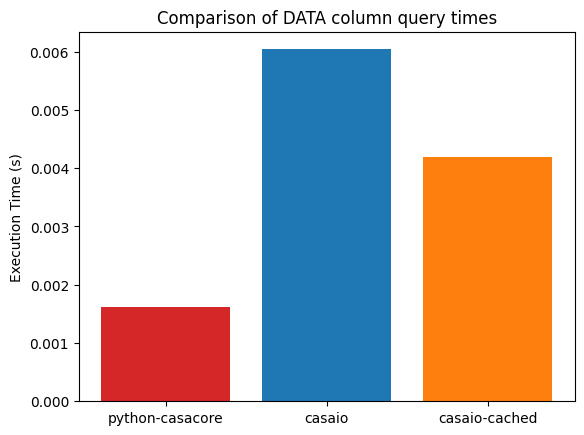

In [7]:
fig, ax = plt.subplots()

labels = ["python-casacore", "casaio", "casaio-cached"]
bar_labels = ["cpy-cc", "cio", "cio-cached"]
bar_colors = ["tab:red", "tab:blue", "tab:orange"]


ax.bar(labels, times, label=bar_labels, color=bar_colors)

ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of DATA column query times')

plt.show()

plt.show()

In [ ]:
np.stack([]